# Numpy和Matplotlib强化

## 信号的仿真与处理

In [ ]:
import numpy as np
# 引入绘图包，另外一个常用的是matplotlib.pylab
from matplotlib import pyplot as plt
# import matplotlib.pyplot as plt  # 这样写也可以

# 设定在线直接显示，不需要plt.show()
%matplotlib inline

In [4]:
print(np.sin(30*np.pi/180.))

0.49999999999999994


In [14]:
# 先准备点数据
# numpy, np.array, shape
# numpy.arange   -  Python range
#    arange， linspace

x = np.arange(-10, 10, 0.5)
y = np.sin(x)


In [15]:
x.shape, y.shape

((40,), (40,))

In [16]:
x.dtype

dtype('float64')

(6.0, -4.0)

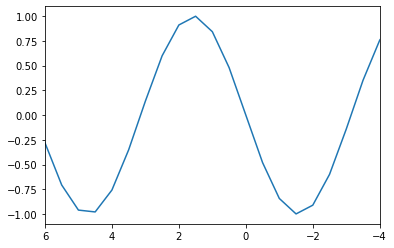

In [17]:
# 最简单的绘图，直接使用plt，然后可以设置一些参数
plt.plot(x, y)
# x轴的 limit 
plt.xlim(6, -4)

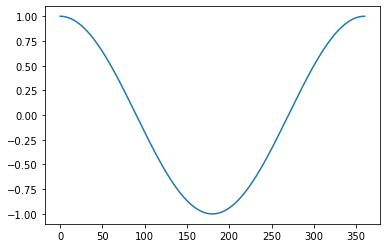

In [12]:
# x = np.arange(0,2*np.pi+0.1,0.1)
x = np.linspace(0,360,num=3600)
y = np.cos(x/180*np.pi)
plt.plot(x,y)
plt.show()

Text(0, 0.5, 'SIN($F_X$)')

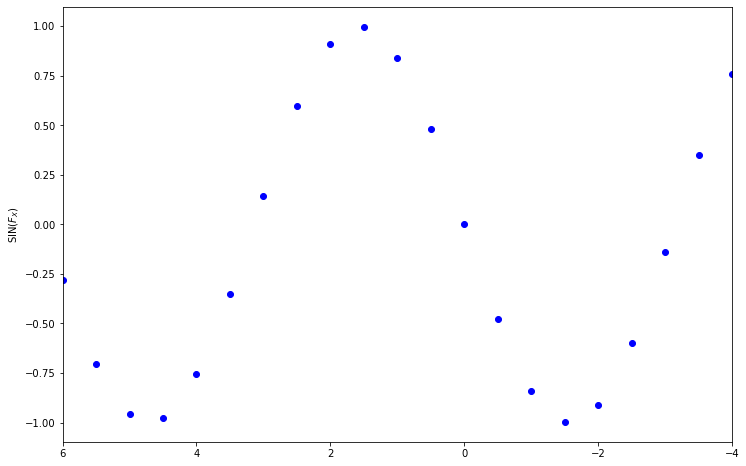

In [18]:
# 先创建画布和坐标轴（子图），然后绘图 Figure ax=axis
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
ax.plot(x, y, "bo")
ax.set_xlim(6, -4)
ax.set_ylabel("SIN($F_X$)")  # 文本可以用简单的TeX公式  Latex

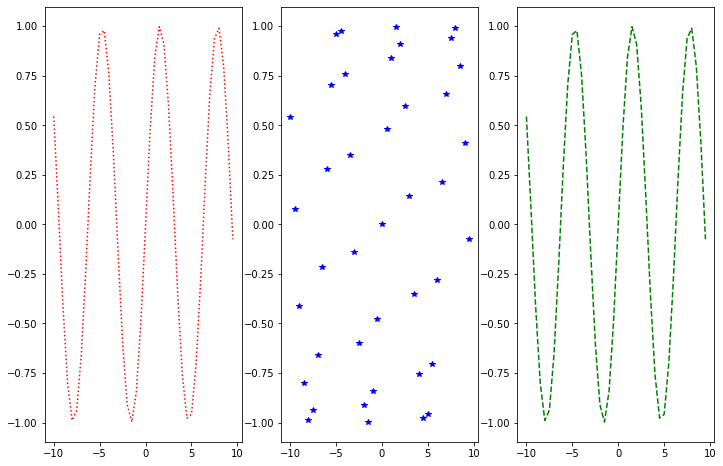

In [6]:
# 带3张子图的绘图，注意绘图的颜色和线型
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 8))
ax1.plot(x, y, "r:")
ax2.plot(x, y, "b*")
ax3.plot(x, y, "g--")
# color: w-white b-blue r-red g-green m-megenta y-yellow c-cyan k-black
# lineshape - -- :   markers: * . o , ^ V < > + x s  

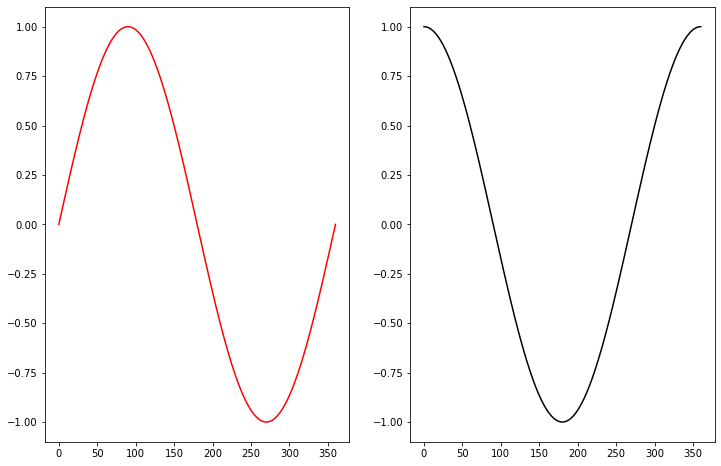

In [22]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,8))
x = np.linspace(0,360,num=3600)
y1 = np.sin(x/180*np.pi)
y2 = np.cos(x/180*np.pi)
ax1.plot(x,y1,'r')
ax2.plot(x,y2,'k')

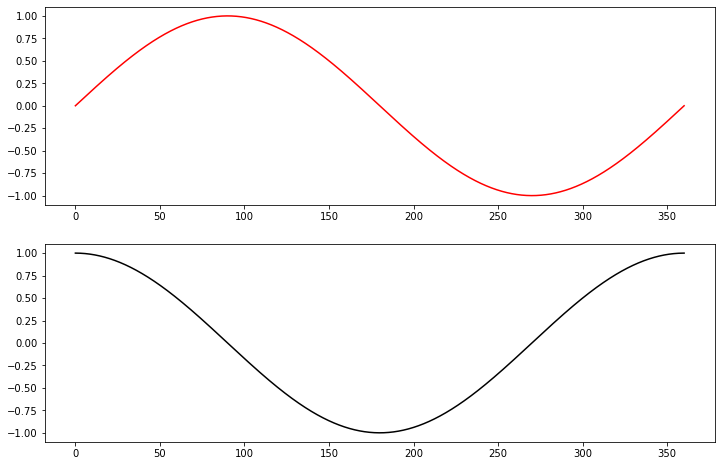

In [31]:
fig,(ax1,ax2)=plt.subplots(2,1,figsize=(12,8))
x = np.linspace(0,360,num=3600)
y1 = np.sin(x/180*np.pi)
y2 = np.cos(x/180*np.pi)
ax1.plot(x,y1,'r')
ax2.plot(x,y2,'k')

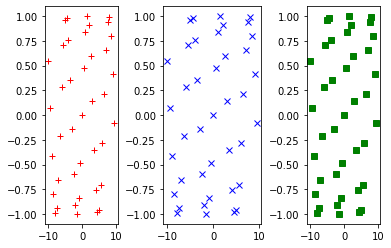

In [7]:
# 先单独创建画布，再添加子图。这里添加的是规则子图，也可以指定位置和大小，甚至子图之前可以重叠
fig = plt.figure()
ax1 = fig.add_subplot(141)
ax1.plot(x, y, "r+")
ax2 = fig.add_subplot(144)
ax2.plot(x, y, "gs")
ax3 = fig.add_subplot(132)
ax3.plot(x, y, "bx")

In [8]:
# 更多范例，建议参考matplotlib官网手册，或者http://astroplotlib.stsci.edu

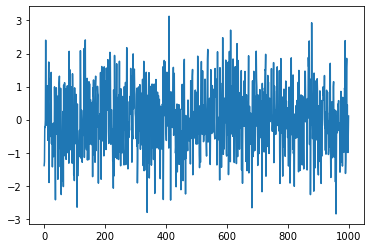

In [6]:
mean = 0
std = 1 
num_samples = 1000
samples = np.random.normal(mean, std, size=num_samples)

plt.plot(samples)
plt.show()

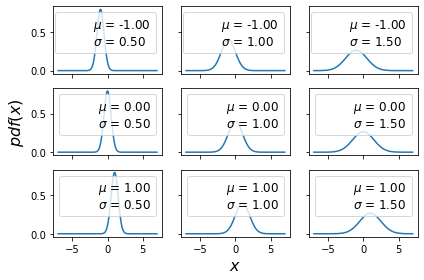

In [32]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
# import seaborn as sns
palette = 'muted'
# sns.set_palette(palette); sns.set_color_codes(palette)

mu_params = [-1, 0, 1]
sd_params = [0.5, 1, 1.5]
x = np.linspace(-7, 7, 100)
f, ax = plt.subplots(len(mu_params), len(sd_params), sharex=True, sharey=True)
for i in range(3):
    for j in range(3):
        mu = mu_params[i]
        sd = sd_params[j]
        y = stats.norm(mu, sd).pdf(x)
        ax[i,j].plot(x, y)
        ax[i,j].plot(0, 0,
        label="$\\mu$ = {:3.2f}\n$\\sigma$ = {:3.2f}".format(mu, sd), alpha=0)
        ax[i,j].legend(fontsize=12)
ax[2,1].set_xlabel('$x$', fontsize=16)
ax[1,0].set_ylabel('$pdf(x)$', fontsize=16)
plt.tight_layout()
# plt.savefig('B04958_01_01.png', dpi=300, figsize=(5.5, 5.5))
plt.show()

拟合函数:            2
-0.0001275 x + 0.02294 x - 0.002501
平均值:7.448486272210175e-16
标准差:0.033331548345328865


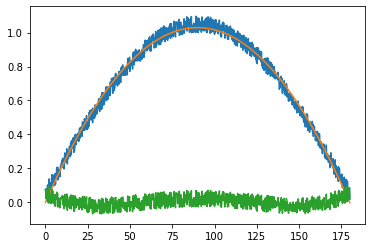

In [24]:
import numpy as np
from matplotlib import pyplot as plt
x = np.linspace(0,180,1000)
y = np.sin(x*np.pi/180)
z = y
noise = np.random.random(1000)
y = y + noise/10.
plt.plot(x,y)
real1 = np.polyfit(x,y,2)
real2 = np.polyval(real1,x)
noise = y-real2
plt.plot(x,np.poly1d(real1)(x))
plt.plot(x,noise)
print('拟合函数:{}\n平均值:{}\n标准差:{}'.format(np.poly1d(real1),np.mean(noise),np.std(noise)))

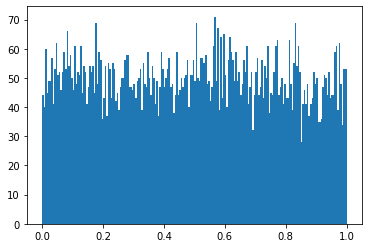

In [19]:
num_samples = 10000
num_bins = 200

samples = np.random.random(size=num_samples)

plt.hist(samples, num_bins)
plt.show()

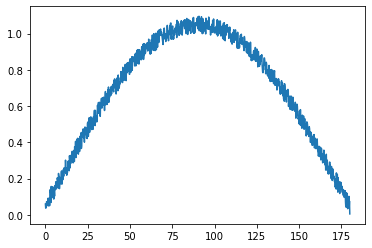

In [35]:
x = np.linspace(0,180,1000)
y = np.sin(x/180*np.pi)
y += np.random.random(1000)/10.
plt.plot(x,y)

(array([ 1.,  2.,  4.,  6.,  8., 10., 10., 17., 13., 33., 32., 32., 49.,
        56., 68., 77., 72., 62., 65., 56., 51., 46., 50., 46., 41., 25.,
        21., 10.,  9., 13.,  6.,  3.,  3.,  0.,  1.,  0.,  1.,  0.,  0.,
         1.]),
 array([-2.89525825, -2.73033128, -2.56540432, -2.40047736, -2.23555039,
        -2.07062343, -1.90569647, -1.7407695 , -1.57584254, -1.41091558,
        -1.24598861, -1.08106165, -0.91613469, -0.75120772, -0.58628076,
        -0.4213538 , -0.25642683, -0.09149987,  0.0734271 ,  0.23835406,
         0.40328102,  0.56820799,  0.73313495,  0.89806191,  1.06298888,
         1.22791584,  1.3928428 ,  1.55776977,  1.72269673,  1.88762369,
         2.05255066,  2.21747762,  2.38240458,  2.54733155,  2.71225851,
         2.87718547,  3.04211244,  3.2070394 ,  3.37196637,  3.53689333,
         3.70182029]),
 <BarContainer object of 40 artists>)

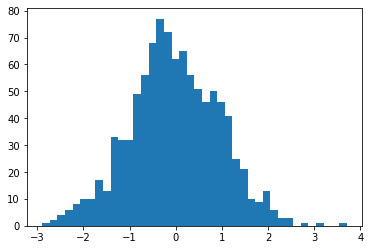

In [5]:

mu, sigma = 0, 1 # mean and standard deviation
s = np.random.normal(mu, sigma, size=1000) # 1000 samples with normal distribution

plt.hist(s, bins=40)

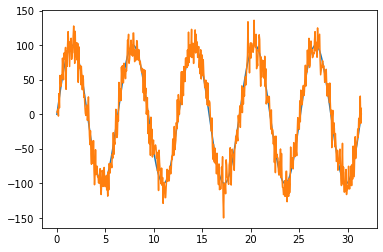

In [18]:
import numpy as np
import matplotlib.pyplot as plt
# from matplotlib import pyplot as plt
#  A SIN (w Theta + Phi)
x = np.linspace(0,10*np.pi, num=600)

s = 100*np.sin(x)
# s1 = 100*np.sin(x/2)
plt.plot(x,s)
# plt.plot(x,s1)

noise = np.random.normal(scale=16, size=x.size)
y = s + noise
plt.plot(x,y)

In [39]:

import time
import random
data = []
for i in range(600000):
    data.append(random.randint(1,100))
newdata = []
for i in range(5,599995):
    sub_data = data[i-5:i+5]
    newdata.append(sum(sub_data)/len(sub_data))
print(len(data),len(newdata))
print(max(newdata))

600000 599990
89.1


In [41]:

import random
import numpy
data = numpy.random.randint(1,100,size=(600000))
data1 = numpy.zeros(599995,dtype=numpy.float64)
for i in range(5,599995):
    data1[i-5] = numpy.mean(data[i-5:i+5])
print(data1.max())

91.7


In [42]:
# Numpy已经存在大量常数

import numpy as np


In [44]:
np.pi, np.e, np.euler_gamma, 

(3.141592653589793, 2.718281828459045, 0.5772156649015329)

In [46]:
np.inf, np.infty, np.Infinity

(inf, inf, inf)

In [47]:
x = [1,2,3,4,5]
x_arr = np.array(x)
print(x_arr.size, x_arr.dtype)

5 int64


In [48]:
print(x_arr.shape)

(5,)


In [49]:
x = range(64)
x_arr = np.array(x)
print(x_arr)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63]


In [51]:
x_arr.shape = 4,4,4

In [52]:
print(x_arr)

[[[ 0  1  2  3]
  [ 4  5  6  7]
  [ 8  9 10 11]
  [12 13 14 15]]

 [[16 17 18 19]
  [20 21 22 23]
  [24 25 26 27]
  [28 29 30 31]]

 [[32 33 34 35]
  [36 37 38 39]
  [40 41 42 43]
  [44 45 46 47]]

 [[48 49 50 51]
  [52 53 54 55]
  [56 57 58 59]
  [60 61 62 63]]]


In [56]:
print(x_arr.shape)

(4, 4, 4)


In [57]:
x_arr = x_arr * 2
print(x_arr)

[[[  0   2   4   6]
  [  8  10  12  14]
  [ 16  18  20  22]
  [ 24  26  28  30]]

 [[ 32  34  36  38]
  [ 40  42  44  46]
  [ 48  50  52  54]
  [ 56  58  60  62]]

 [[ 64  66  68  70]
  [ 72  74  76  78]
  [ 80  82  84  86]
  [ 88  90  92  94]]

 [[ 96  98 100 102]
  [104 106 108 110]
  [112 114 116 118]
  [120 122 124 126]]]


In [60]:
x = np.array(range(27))
x.shape = 3,3,3
print(x)

[[[ 0  1  2]
  [ 3  4  5]
  [ 6  7  8]]

 [[ 9 10 11]
  [12 13 14]
  [15 16 17]]

 [[18 19 20]
  [21 22 23]
  [24 25 26]]]


In [70]:
y = np.array( range(26,-1, -1) )
# y = y.reshape(3,3,3)
print(y)

[26 25 24 23 22 21 20 19 18 17 16 15 14 13 12 11 10  9  8  7  6  5  4  3
  2  1  0]


In [75]:
y = y.reshape(3,3,3)

In [76]:
print(x-y)

[[[-26 -24 -22]
  [-20 -18 -16]
  [-14 -12 -10]]

 [[ -8  -6  -4]
  [ -2   0   2]
  [  4   6   8]]

 [[ 10  12  14]
  [ 16  18  20]
  [ 22  24  26]]]


In [77]:
print(x*y)

[[[  0  25  48]
  [ 69  88 105]
  [120 133 144]]

 [[153 160 165]
  [168 169 168]
  [165 160 153]]

 [[144 133 120]
  [105  88  69]
  [ 48  25   0]]]


In [78]:
print(x@y)

[[[ 63  60  57]
  [270 258 246]
  [477 456 435]]

 [[414 384 354]
  [540 501 462]
  [666 618 570]]

 [[279 222 165]
  [324 258 192]
  [369 294 219]]]


In [81]:
z = np.ones((3,3,3))

In [83]:
z1 = np.zeros_like(x)

In [84]:
print(z1.shape)
print(z1)

(3, 3, 3)
[[[0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]]]


In [87]:
print(dir(x))

['T', '__abs__', '__add__', '__and__', '__array__', '__array_finalize__', '__array_function__', '__array_interface__', '__array_prepare__', '__array_priority__', '__array_struct__', '__array_ufunc__', '__array_wrap__', '__bool__', '__class__', '__complex__', '__contains__', '__copy__', '__deepcopy__', '__delattr__', '__delitem__', '__dir__', '__divmod__', '__doc__', '__eq__', '__float__', '__floordiv__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__gt__', '__hash__', '__iadd__', '__iand__', '__ifloordiv__', '__ilshift__', '__imatmul__', '__imod__', '__imul__', '__index__', '__init__', '__init_subclass__', '__int__', '__invert__', '__ior__', '__ipow__', '__irshift__', '__isub__', '__iter__', '__itruediv__', '__ixor__', '__le__', '__len__', '__lshift__', '__lt__', '__matmul__', '__mod__', '__mul__', '__ne__', '__neg__', '__new__', '__or__', '__pos__', '__pow__', '__radd__', '__rand__', '__rdivmod__', '__reduce__', '__reduce_ex__', '__repr__', '__rfloordiv__', '__rlshift_

In [89]:
y = y.reshape(-1)

In [91]:
x = x.reshape(9,3)

In [93]:
x = x.reshape(3,3,3)

In [94]:
x = x.reshape(9,-1)

In [95]:
x

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11],
       [12, 13, 14],
       [15, 16, 17],
       [18, 19, 20],
       [21, 22, 23],
       [24, 25, 26]])

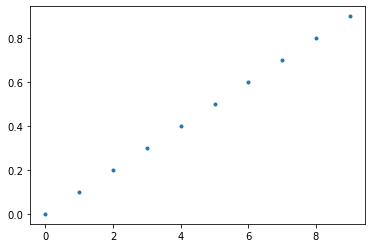

In [97]:
import matplotlib.pyplot as plt

arr = np.arange(0,1,0.1)

plt.plot(arr,'.')

In [98]:
data = np.random.rand(10000,10000)
plt.scatter(data

In [118]:
x = np.arange(16).reshape(4,4)
print(x[:])

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]


In [99]:
print(data.shape,data.max(),data.min())

(100, 100) 0.9999692878602594 0.00011240477844143282


In [106]:
x1 = np.random.rand(200000)
y1 = np.random.rand(200000)

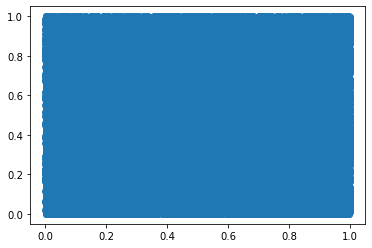

In [107]:
plt.scatter(x1,y1)

In [108]:
# x1 横坐标， y1 纵坐标

r = np.sqrt(x1*x1 + y1*y1)

In [110]:
print(r)

[1.02514484 0.6863183  1.02665133 ... 0.98667745 0.60484293 0.91140163]


In [112]:
print(r<1)

[False  True False ...  True  True  True]


In [113]:
print(np.sum((r<=1)==True))

157057


In [114]:
print(157057/200000*4)

3.14114


In [ ]:
创建任意维度的数组
numpy.zeros(shape=(...),dtype='float64'))

怎么改变shape
数组名.shape = 
x = x.reshape(.....)

numpy函数
   min, max, mean, sum...

numpy.random

scatter  - 散点图

numpy数组通过条件判断试，产生Bool


百度： FITS 文件 
自学 ，什么叫FITS文件？
